In [1]:
# ! pip install wget

In [2]:
from zipfile import ZipFile
import os
from distutils.dir_util import copy_tree, remove_tree
import wget
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from random import randint
import numpy as np
print("Import référence done")

Import référence done


   ## 1) Import des data  

In [3]:
if os.path.exists("DataAlZheimer.zip") :
     os.remove("DataAlZheimer.zip")  
url = 'https://drive.google.com/u/0/uc?id=1obMMlDq8DFNaGazR097AtIIjnH-Nlvuh&export=download&confirm=0'
wget.download(url)

'DataAlzheimer.zip'

## 2) Depacketage Data 

In [4]:
INPUT_DIR= "./Data/"
if os.path.exists(INPUT_DIR):
    remove_tree(INPUT_DIR)    
with ZipFile("DataAlZheimer.zip", 'r') as zObject:
    zObject.extractall(path=INPUT_DIR)
print("Dezipper done")

Dezipper done


## 3) Chargement DATA et standardisation

In [5]:
train_batches = ImageDataGenerator(validation_split=0.1) \
                .flow_from_directory("Data/Alzheimer_s Dataset/train",  
                                     classes = ['NonDemented', 'VeryMildDemented', 
                                                'MildDemented', 'ModerateDemented'], target_size=(64,64),
                                     subset='training',
                                     batch_size=10000)
CLASSES = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
trainX, trainY0  = train_batches.next()
trainX = trainX/255

Found 4610 images belonging to 4 classes.


## 4) Visualisation data 

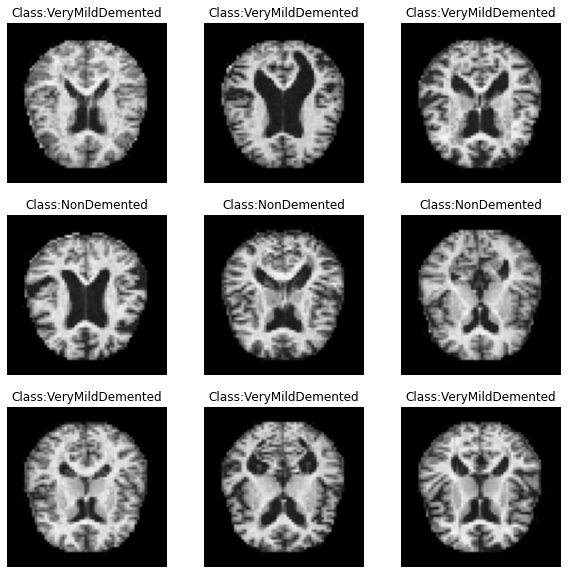

In [7]:
# define funtion to Display random list of Train Images
def show_images(x, y, y_pred=None):
    
    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))
    
    # get a batch of images
    #x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 3000)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
            
    #plt.savefig(SAVE_DIR + "random_list_of_Train_Images.png", bbox_inches = 'tight')
    
# Display Train Images

show_images(trainX, trainY0)
